In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  
import pandas as pd

# this tells Jupyter to embed matplotlib plots in the notebook
%matplotlib inline

In [43]:
df = pd.read_csv('./summerOly_medal_counts.csv')
df['NOC'] = df['NOC'].str.replace('\xa0', '', regex=True)

In [44]:
df.head()

,Rank,NOC,Gold,Silver,Bronze,Total,Year
0,1,United States,11,7,2,20,1896
1,2,Greece,10,18,19,47,1896
2,3,Germany,6,5,2,13,1896
3,4,France,5,4,2,11,1896
4,5,Great Britain,2,3,2,7,1896


In [46]:
unique_values = df['NOC'].unique()

print(unique_values) 

['United States' 'Greece' 'Germany' 'France' 'Great Britain' 'Hungary'
 'Austria' 'Australia' 'Denmark' 'Switzerland' 'Mixed team' 'Belgium'
 'Italy' 'Cuba' 'Canada' 'Spain' 'Luxembourg' 'Norway' 'Netherlands'
 'India' 'Bohemia' 'Sweden' 'Australasia' 'Russian Empire' 'Finland'
 'South Africa' 'Estonia' 'Brazil' 'Japan' 'Czechoslovakia' 'New Zealand'
 'Yugoslavia' 'Argentina' 'Uruguay' 'Poland' 'Haiti' 'Portugal' 'Romania'
 'Egypt' 'Ireland' 'Chile' 'Philippines' 'Mexico' 'Latvia' 'Turkey'
 'Jamaica' 'Peru' 'Ceylon' 'Trinidad and Tobago' 'Panama' 'South Korea'
 'Iran' 'Puerto Rico' 'Soviet Union' 'Lebanon' 'Bulgaria' 'Venezuela'
 'United Team of Germany' 'Iceland' 'Pakistan' 'Bahamas' 'Ethiopia'
 'Formosa' 'Ghana' 'Morocco' 'Singapore' 'British West Indies' 'Iraq'
 'Tunisia' 'Kenya' 'Nigeria' 'East Germany' 'West Germany' 'Mongolia'
 'Uganda' 'Cameroon' 'Taiwan' 'North Korea' 'Colombia' 'Niger' 'Bermuda'
 'Thailand' 'Zimbabwe' 'Tanzania' 'Guyana' 'China' 'Ivory Coast' 'Syria'
 'Algeria

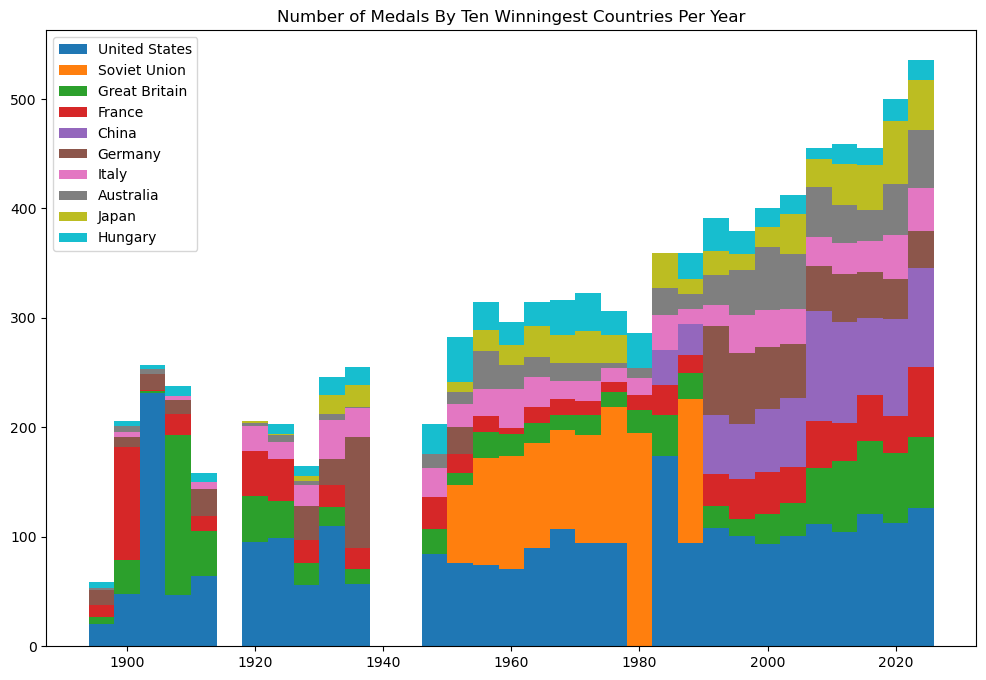

In [92]:
#stacked histogram
countries = df['NOC'].unique()  # Unique countries
years = sorted(df['Year'].unique())  # Unique years

medals = {country: [] for country in countries}
for year in years:
    year_data = df[df['Year'] == year]
    total_medals = year_data['Total'].sum()
    for country in countries:
        country_medals = year_data[year_data['NOC'] == country]['Total'].sum()
        medals[country].append(country_medals if total_medals > 0 else 0)

# Calculate total medals for each country across all years
total_medals_by_country = {country: sum(medals[country]) for country in medals.keys()}

n=10
# Get the top n countries based on total medals
top_n_countries = sorted(total_medals_by_country, key=total_medals_by_country.get, reverse=True)[:n]

# Filter the medals dictionary to include only the top n countries
filtered_medals = {country: medals[country] for country in top_n_countries}
#print(medals)

fig, ax = plt.subplots(figsize=(12,8))
bottom = np.zeros(len(years))

for boolean, medal in filtered_medals.items():
    p = ax.bar(years, medal, 4, label=boolean, bottom=bottom)
    bottom += medal
    
ax.set_title("Number of Medals By Ten Winningest Countries Per Year")
ax.legend(loc="upper left")

plt.show()

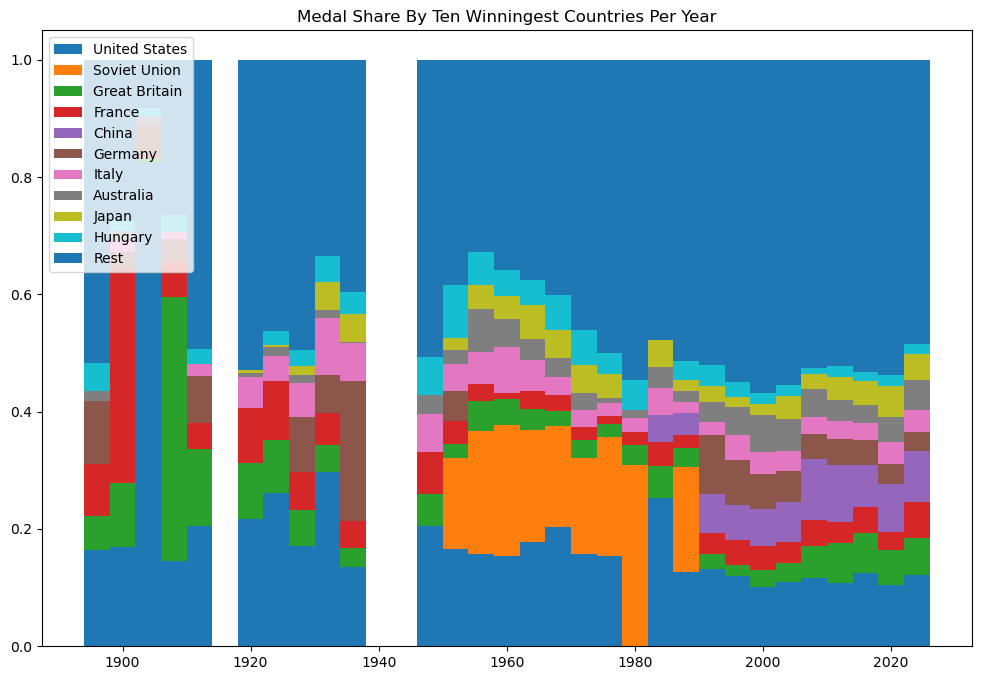

In [100]:
# Calculate total medals for each country across all years
medalshares = {country: [] for country in countries}
for year in years:
    year_data = df[df['Year'] == year]
    total_medals = year_data['Total'].sum()
    for country in countries:
        country_medals = year_data[year_data['NOC'] == country]['Total'].sum()
        medalshares[country].append(country_medals / total_medals if total_medals > 0 else 0)

total_medals_by_country = {country: sum(medals[country]) for country in medals.keys()}

n=10
# Get the top n countries based on total medals
top_n_countries = sorted(total_medals_by_country, key=total_medals_by_country.get, reverse=True)[:n]

# Filter the medals dictionary to include only the top n countries
# Add the "Rest" category
filtered_medalshares = {country: medalshares[country] for country in top_n_countries}
rest_shares = [0] * len(years)
for country in countries:
    if country not in top_n_countries:
        rest_shares = [r + m for r, m in zip(rest_shares, medalshares[country])]
filtered_medalshares["Rest"] = rest_shares

fig, ax = plt.subplots(figsize=(12,8))
bottom = np.zeros(len(years))

for boolean, medal_s in filtered_medalshares.items():
    p = ax.bar(years, medal_s, 4, label=boolean, bottom=bottom)
    bottom += medal_s
    
ax.set_title("Medal Share By Ten Winningest Countries Per Year")
ax.legend(loc="upper left")

plt.show()

In [47]:
pivot_data = df.pivot_table(index="Year", columns="NOC", values="Total", aggfunc="sum", fill_value=0)

In [52]:
print(pivot_data.head())
pivot_data.columns

NOC   Afghanistan  Albania  Algeria  Argentina  Armenia  Australasia  \
Year                                                                   
1896            0        0        0          0        0            0   
1900            0        0        0          0        0            0   
1904            0        0        0          0        0            0   
1908            0        0        0          0        0            5   
1912            0        0        0          0        0            7   

NOC   Australia  Austria  Azerbaijan  Bahamas  ...  United Team of Germany  \
Year                                           ...                           
1896          2        5           0        0  ...                       0   
1900          5        6           0        0  ...                       0   
1904          4        3           0        0  ...                       0   
1908          0        1           0        0  ...                       0   
1912          0        4   

Index(['Afghanistan', 'Albania', 'Algeria', 'Argentina', 'Armenia',
       'Australasia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas',
       ...
       'United Team of Germany', 'Uruguay', 'Uzbekistan', 'Venezuela',
       'Vietnam', 'Virgin Islands', 'West Germany', 'Yugoslavia', 'Zambia',
       'Zimbabwe'],
      dtype='object', name='NOC', length=164)

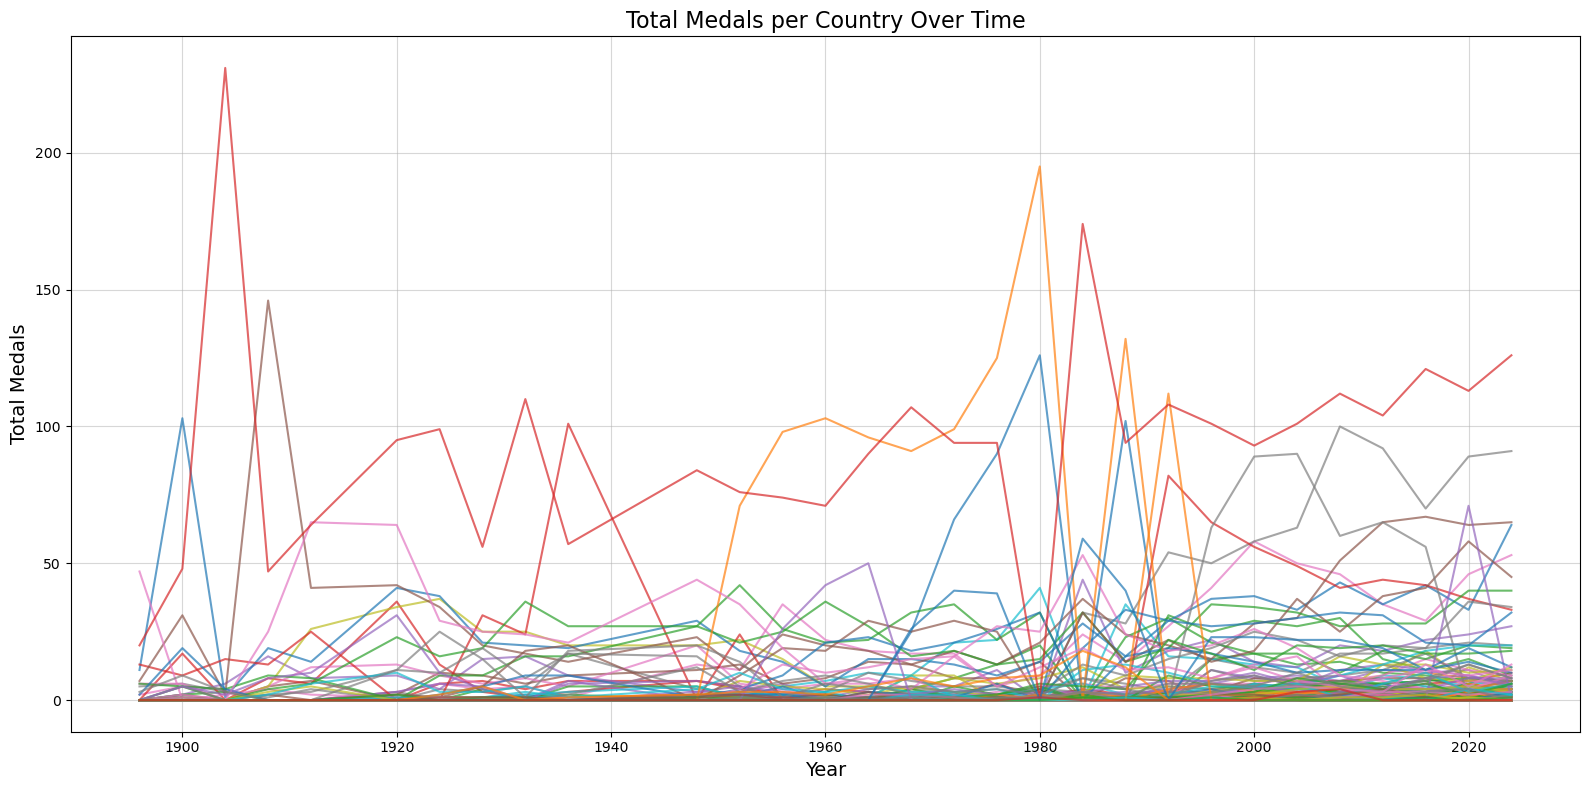

In [53]:
# each country's total medals over time on the same graph
pivot_data.plot(figsize=(16, 8), legend=False, alpha=0.7)
plt.title("Total Medals per Country Over Time", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Total Medals", fontsize=14)
plt.grid(alpha=0.5)

# legend outside the plot
#plt.legend(pivot_data.columns, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.tight_layout()
plt.show()

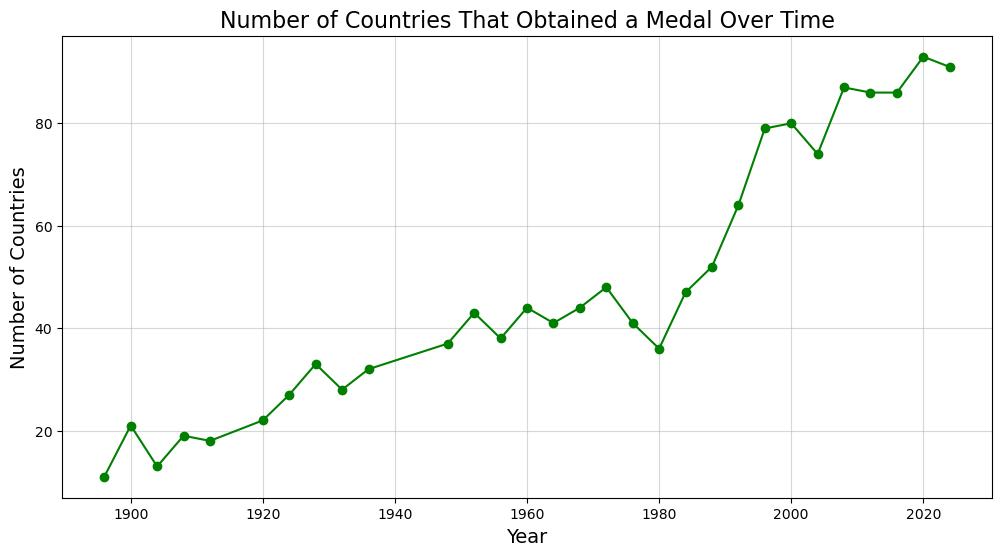

In [55]:
# Calculate the number of unique countries (NOC) with at least one medal per year
countries_with_medals = df[df["Total"] > 0].groupby("Year")["NOC"].nunique()

# Plot the data
plt.figure(figsize=(12, 6))
countries_with_medals.plot(marker="o", color="green")
plt.title("Number of Countries That Obtained a Medal Over Time", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Countries", fontsize=14)
plt.grid(alpha=0.5)
plt.show()

In [58]:
athletes = pd.read_csv('./summerOly_athletes.csv')
athletes.head()

,Name,Sex,Team,NOC,Year,City,Sport,Event,Medal
0,A Dijiang,M,China,CHN,1992,Barcelona,Basketball,Basketball Men's Basketball,No medal
1,A Lamusi,M,China,CHN,2012,London,Judo,Judo Men's Extra-Lightweight,No medal
2,Gunnar Aaby,M,Denmark,DEN,1920,Antwerpen,Football,Football Men's Football,No medal
3,Edgar Aabye,M,Denmark/Sweden,DEN,1900,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,Cornelia (-strannood),F,Netherlands,NED,1932,Los Angeles,Athletics,Athletics Women's 100 metres,No medal


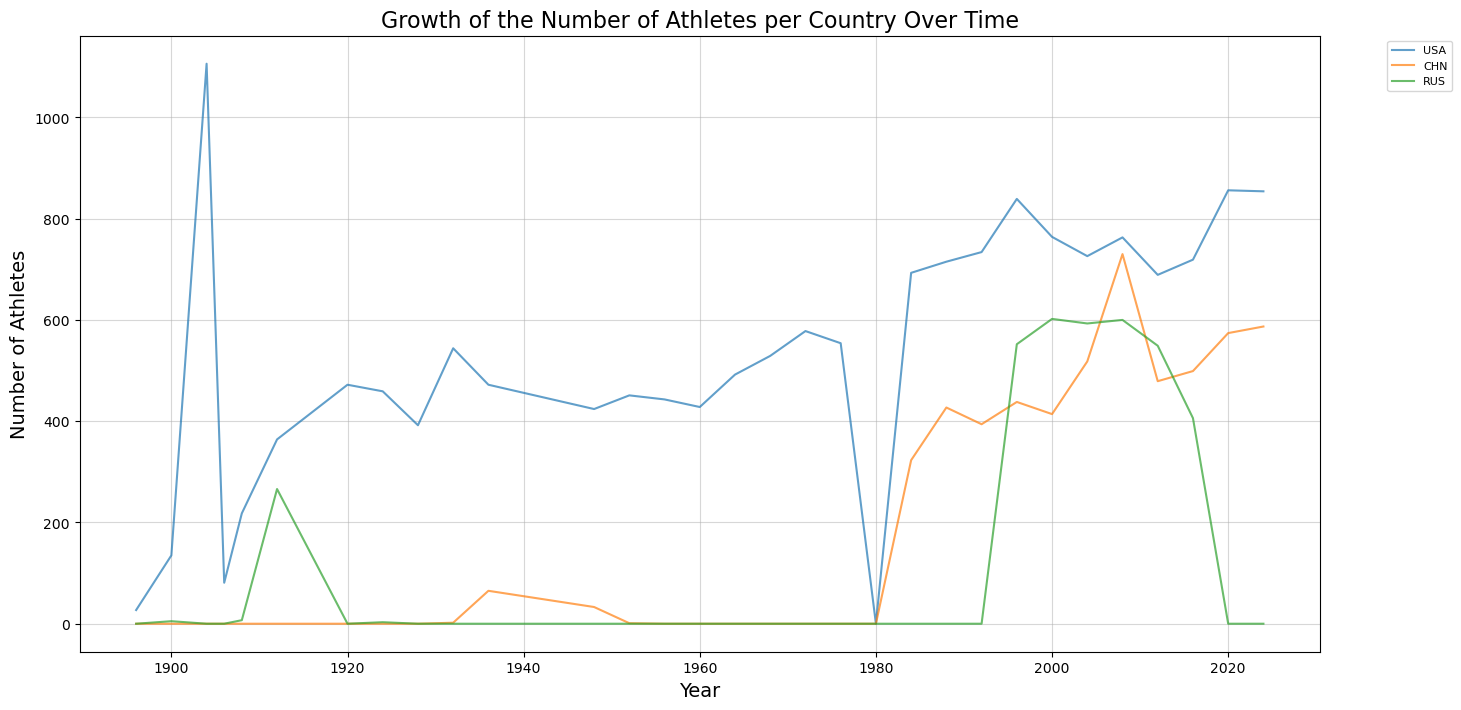

In [62]:
athletes_data = athletes.drop_duplicates()
athlete_counts = athletes_data.groupby(['Year', 'NOC']).size().reset_index(name='Athlete_Count')
athlete_pivot_data = athlete_counts.pivot(index='Year', columns='NOC', values='Athlete_Count').fillna(0)

# Plot each country's line
countries_of_interest = ['USA', 'CHN', 'RUS']
athlete_pivot_data[countries_of_interest].plot(figsize=(16, 8), legend=False, alpha=0.7)

pivot_data_smoothed = athlete_pivot_data.rolling(window=3, min_periods=1).mean()
#pivot_data_smoothed[countries_of_interest].plot(figsize=(16, 8), legend=False, alpha=0.7)

# Add title and labels
plt.title("Growth of the Number of Athletes per Country Over Time", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Athletes", fontsize=14)
plt.grid(alpha=0.5)

# Optionally, add a legend
plt.legend(countries_of_interest, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
#plt.tight_layout()
plt.show()

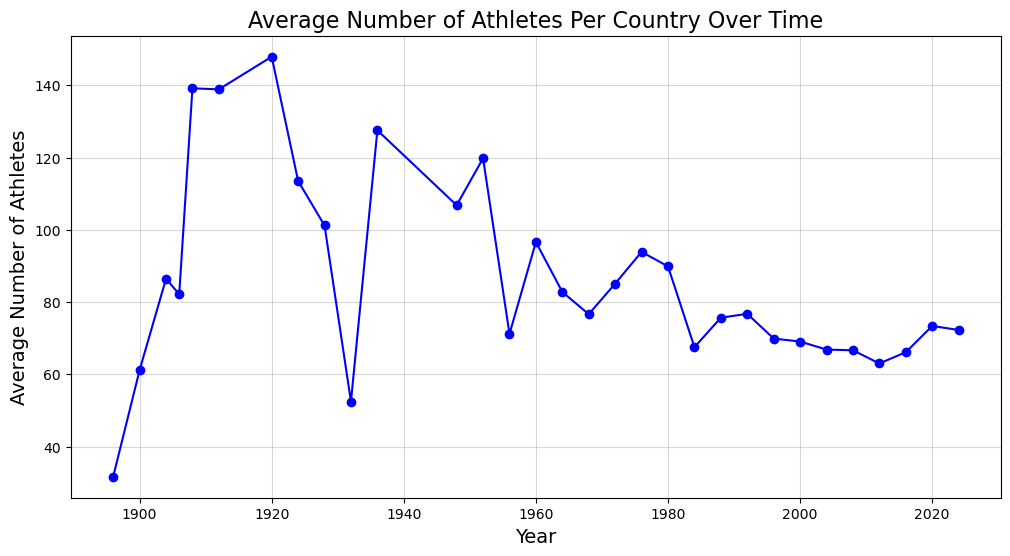

In [64]:
athlete_counts = athletes_data.groupby(['Year', 'NOC']).size().reset_index(name='Athlete_Count')
avg_athletes_per_country = athlete_counts.groupby('Year')['Athlete_Count'].mean()

plt.figure(figsize=(12, 6))
avg_athletes_per_country.plot(marker='o', color='blue')
plt.title("Average Number of Athletes Per Country Over Time", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Average Number of Athletes", fontsize=14)
plt.grid(alpha=0.5)
plt.show()

In [ ]:
countries_with_medals = df[df["Total"] > 0].groupby("Year")["NOC"].nunique()